# Big Data Course Work 2
## Heart Failure Prediction using Machine Learning
### Sam Gallagher Caledonian University


In this project a decision tree and a random forrest algorithm will be used to predict weither a paitent suffered a heart failure due to pre determining factors. Both algorithms will then be tuned in order to achieve the highest accuracy possible. 

Dataset: Heart failure prediction dataset avaliable at: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

Import Modules

In [1]:
# Import Numpy 
import numpy as np
# Import pandas
import pandas as pd
# Import seaborn 
import seaborn as sns
# Import mat plot lib
import matplotlib.pyplot as plt
# Import tree from sklearn
from sklearn import tree
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
# Import Random Forrest Classifier
from sklearn.ensemble import RandomForestClassifier
# Import train_test_split function
from sklearn.model_selection import train_test_split 
# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score
# Import scikit-learn plot tree module for visualising the decision trees 
from sklearn.tree import plot_tree


### Data Pre Processing

##### Import the dataset

In [2]:
data = pd.read_csv("../data/heart_failure_clinical_records_dataset.csv")

##### Display number of rows and collumns then give a sample visual of the data 

In [3]:
print(data.shape)
data.head()

(299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


##### Display the columns names for future reference

In [4]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

##### Display the data types within each of the collumns to decide wither further processing is required

In [5]:
print(data.dtypes)

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


##### Check to see if duplicate rows exist within the data

In [6]:
duplicate_rows = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows.shape)

number of duplicate rows:  (0, 13)


There are no duplicate rows

##### Print summary statictics 

In [7]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


##### Visualising the first 10 rows

In [8]:
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


##### Count missing values

In [9]:
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

##### Count null values

In [10]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Within the dataset all data is numeric so no tranformation is required

Columns Anaemia, Diabetes, High Blood Pressure, Smoking, Sex and Death Event are all in binary form representing either 0 or 1 depending on the stipulation

From this we can infer no null or missing values exist within the dataset

##### Correlating the data

Relationship between each variable and Death Event 

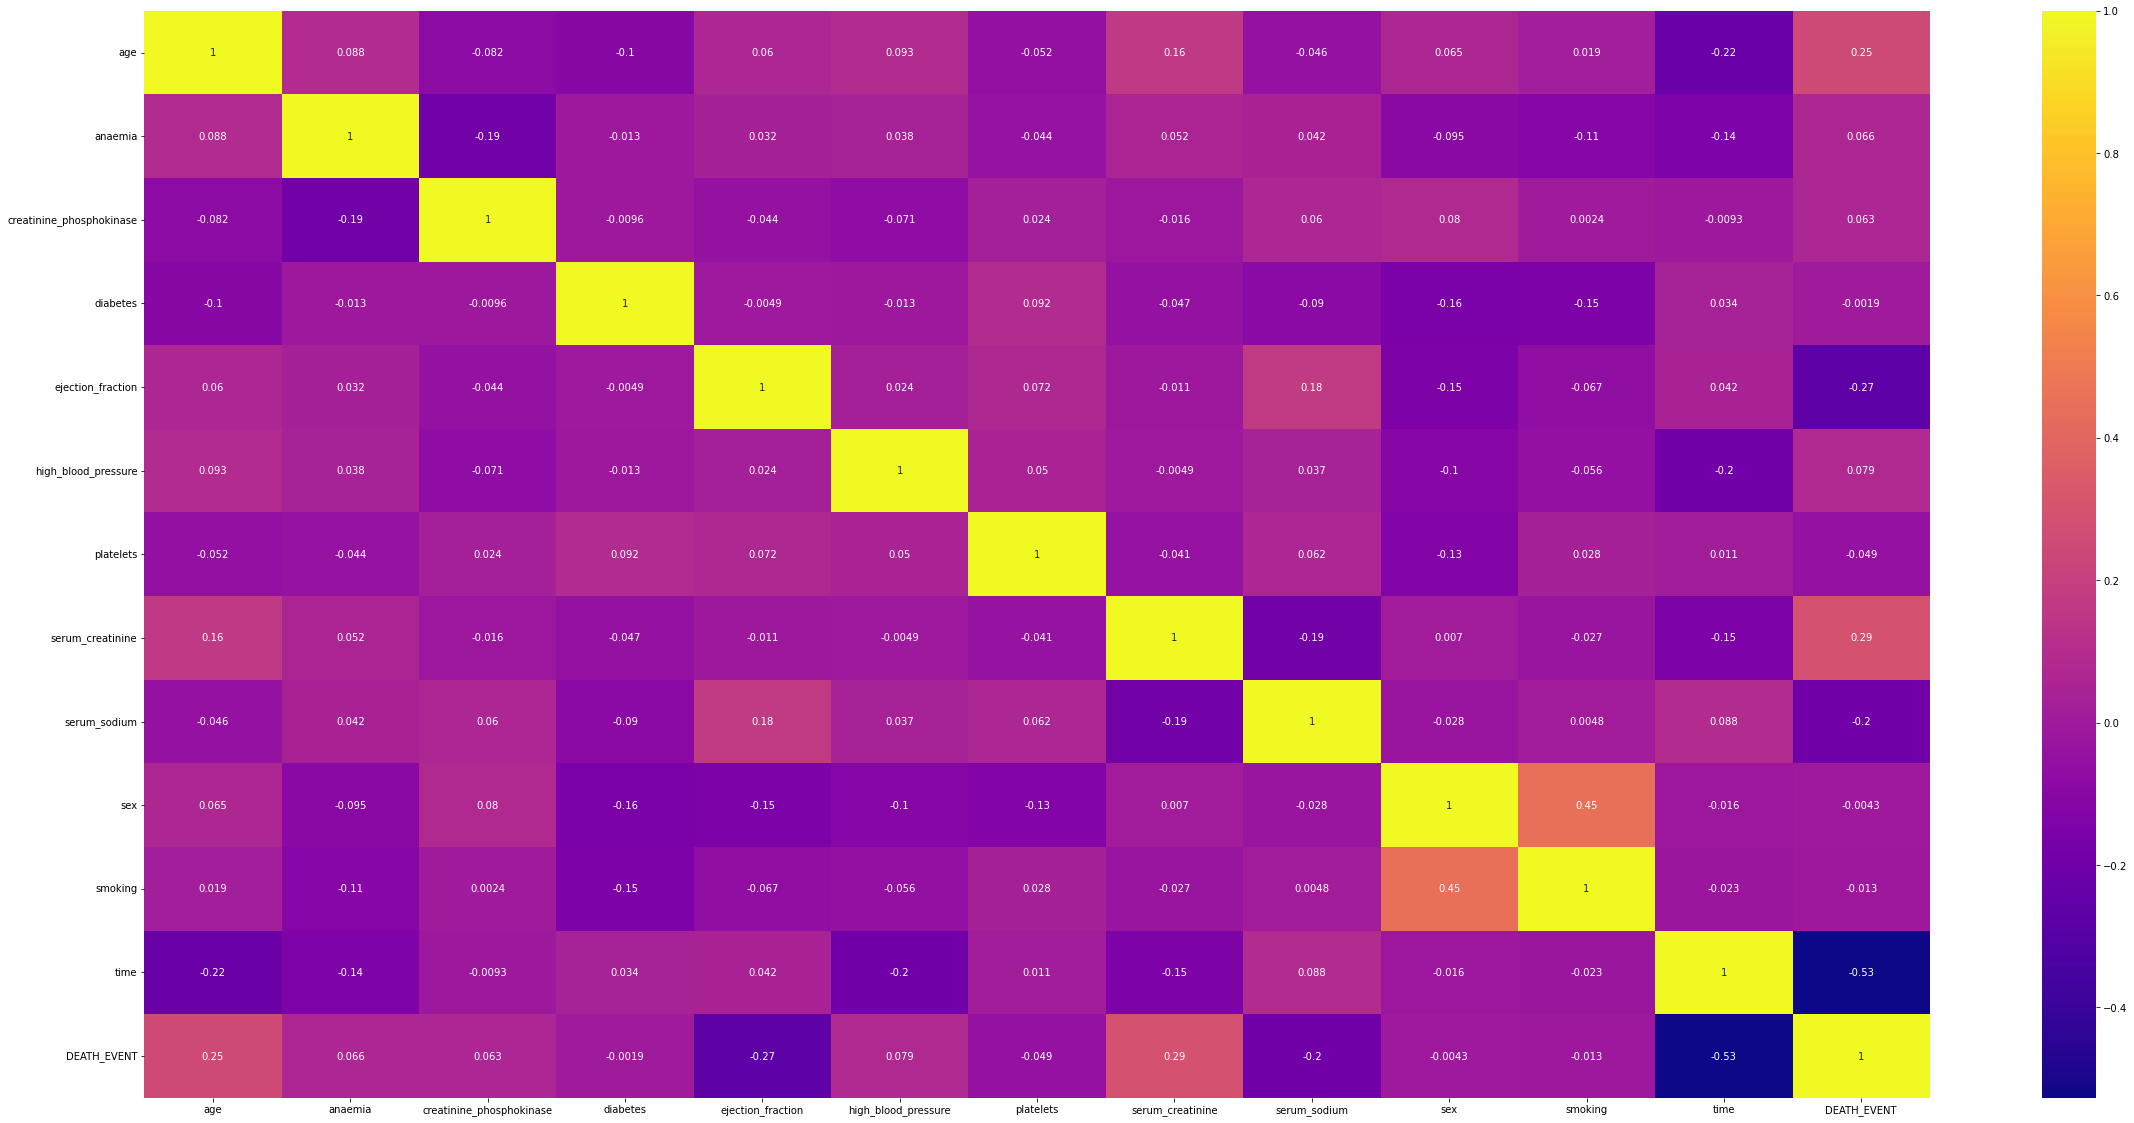

In [11]:
plt.figure(figsize=(40,20))
sns.heatmap(data.corr(), cmap="plasma", annot=True)
plt.show()

From the heatmap above the higherst corrolation between values is 0.45 (sex and age) witht he target value death event having a 0.29 positive correlation with serum creatine. Due to the positive values being a medium positive correlation the data can be considered to be not higly correlated and thus no futher processing on correlation is required

##### Balancing the dataset

In [12]:
deathEvent = data.groupby("DEATH_EVENT")

deathEvent.count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96


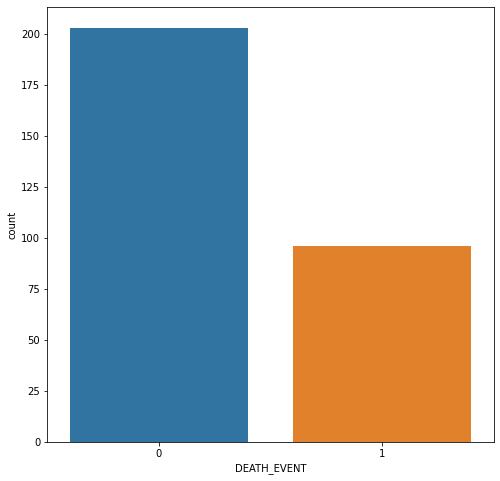

In [13]:
plt.figure(figsize=(8,8))
sns.countplot(x="DEATH_EVENT",data=data)
plt.show()

The group by and count functions have been used to display the total number of occurences of death within the dataset. The above numbers display an inbalance between instances where death did not occur. As the previous heatmap confirmed the values to be not highly correlated the use of a random under-sampling method will be appropriate to remove some values. 

In [14]:
# Count each groups total
dEvent_count_0, dEvent_count_1 = data["DEATH_EVENT"].value_counts()

# Split into two groups
dEvent_group_0 = data[data["DEATH_EVENT"]==0]
dEvent_group_1 = data[data["DEATH_EVENT"]==1]

dEvent_group_0_under = dEvent_group_0.sample(dEvent_count_1)
data = pd.concat([dEvent_group_0_under, dEvent_group_1], axis=0)

print("Random under-sampling:")
data.groupby("DEATH_EVENT").count()

Random under-sampling:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,96,96,96,96,96,96,96,96,96,96,96,96
1,96,96,96,96,96,96,96,96,96,96,96,96


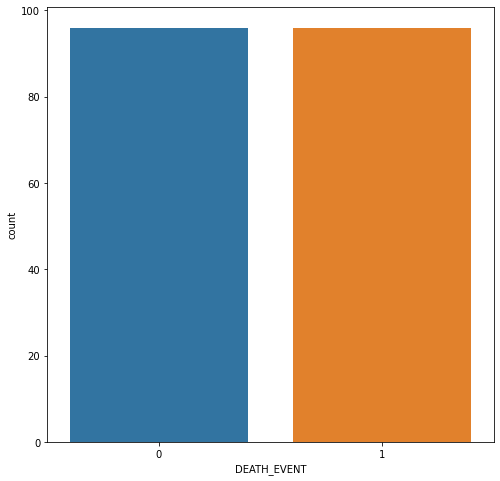

In [15]:
plt.figure(figsize=(8,8))
sns.countplot(x="DEATH_EVENT",data=data)
plt.show()

Following the under-sampling, the dataset is now balanced between instances where a death event occured or not. The dataset is now in a state ready for machine learning algorithms

### Building the models and testing accuracy

##### Splitting the Dataset

The dataset will now be split into the input variables x and the target variable y

In [16]:
x = data.drop(["DEATH_EVENT"], axis=1)

x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
191,64.0,1,62,0,60,0,309000.00,1.50,135,0,0,174
120,60.0,1,737,0,60,1,210000.00,1.50,135,1,1,95
292,52.0,0,190,1,38,0,382000.00,1.00,140,1,1,258
101,75.0,0,582,0,45,1,263358.03,1.18,137,1,0,87
83,79.0,1,55,0,50,1,172000.00,1.80,133,1,0,78


In [17]:
y = data["DEATH_EVENT"]

print(y[0:192])

191    0
120    0
292    0
101    0
83     0
      ..
220    1
230    1
246    1
262    1
266    1
Name: DEATH_EVENT, Length: 192, dtype: int64


The datasets will now be split into: 70% training data and 30% test data

In [18]:
x_train, x_Vali_test, y_train, y_Vali_test = train_test_split(x, y, test_size=0.3, random_state=1) 

print(x_train.shape)

(134, 12)


##### Building the Decision Tree

The decision tree is created and the training data is applied. Following the training of the model the prediction variable is created and the x validation testing data is supplied to a prediciton fucntion. Finally the models accuracy is tested through the metrics accuracy score fucntion in which the previous prediciton model is compared to the known answer. 

In [19]:
clf = DecisionTreeClassifier()

clf = clf.fit(x_train, y_train)

y_pred_01 = clf.predict(x_Vali_test)

Accuracy = accuracy_score(y_Vali_test, y_pred_01)

print("Accuracy: %.2f" % (Accuracy*100), "%")

Accuracy: 81.03 %


##### Visualising the Current Decision Tree

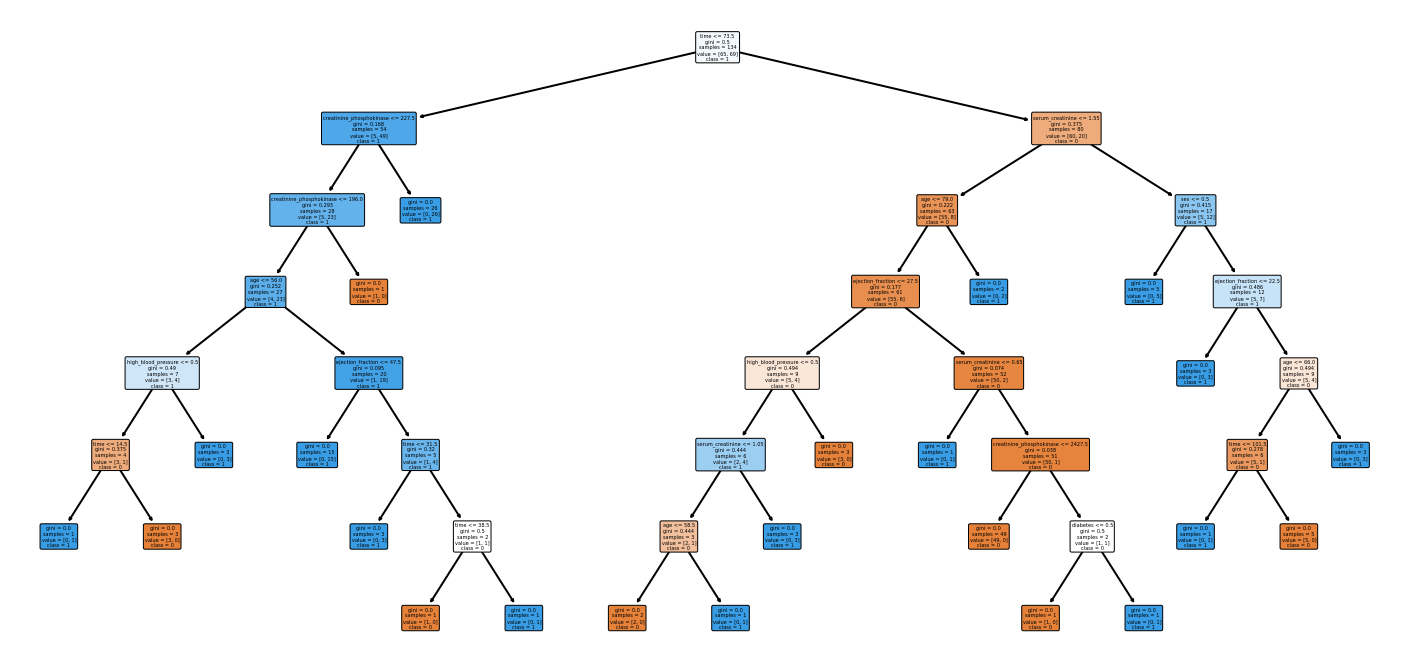

In [20]:
feature_cols = ['age', 'anaemia','creatinine_phosphokinase','diabetes','ejection_fraction', 'high_blood_pressure','platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']

plt.figure(figsize=(25,12))
a = plot_tree(clf, feature_names=feature_cols, class_names=['0','1'], filled=True, rounded=True, fontsize = 5)

for o in a:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(2)

##### Tuning the Decision Tree

As above a decisiontree classifer is created but in this case entropy is added as a criteria to ensure maximum information gain when performing the classifications. Max depth is applied to limit the number of nodes created.

In [21]:
clf_02 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

clf_02 = clf_02.fit(x_train,y_train)

y_pred_02 = clf_02.predict(x_Vali_test)

Accuracy = accuracy_score(y_Vali_test, y_pred_02)

print("Accuracy: %.2f" % (Accuracy*100), "%")

Accuracy: 82.76 %


##### Visualisation of the Tuned Decision Tree

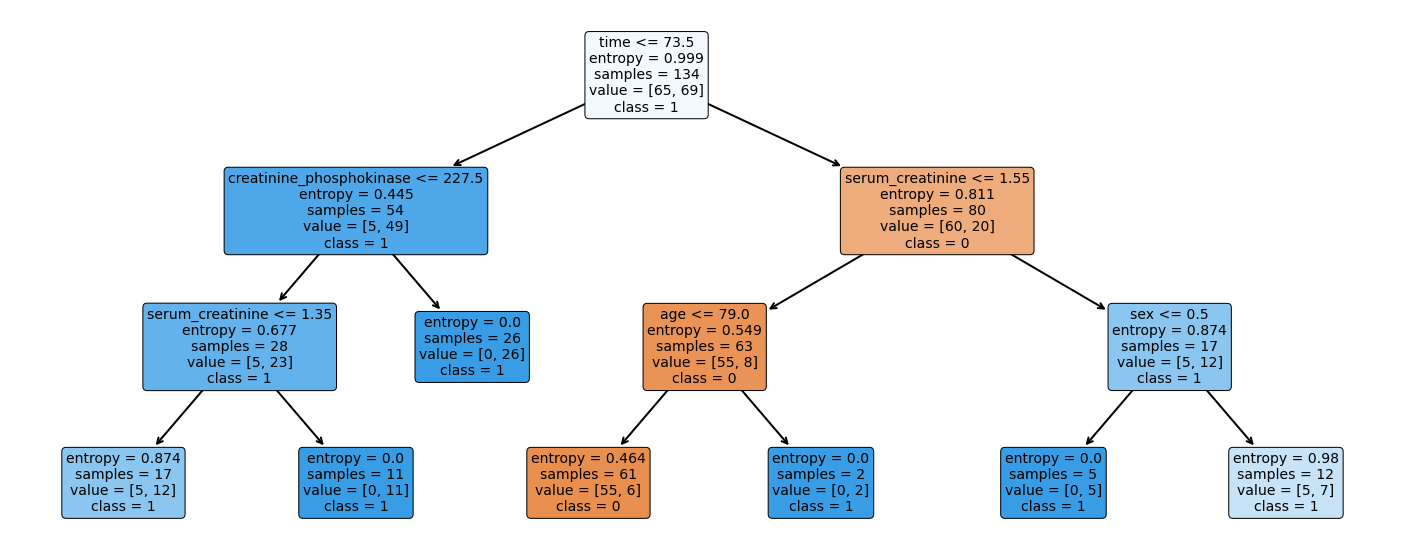

In [22]:
plt.figure(figsize=(25,10))

a = plot_tree(clf_02, feature_names=feature_cols, class_names=['0','1'], filled=True, rounded=True, fontsize = 14)

for o in a:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(2)

##### Building a Random Forrest 

In [23]:
clf_03 = RandomForestClassifier()

clf_03.fit(x_train, y_train)

y_pred_03 = clf_03.predict(x_Vali_test)

Accuracy = accuracy_score(y_Vali_test, y_pred_03)

print("Accuracy: %.2f" % (Accuracy*100), "%")

Accuracy: 81.03 %


##### Visualising the Individual Decision Trees within the Forrest

Clear this cell after running as it generates all 100 trees in the Random forrest. The Random forrest by default will use 100 trees.

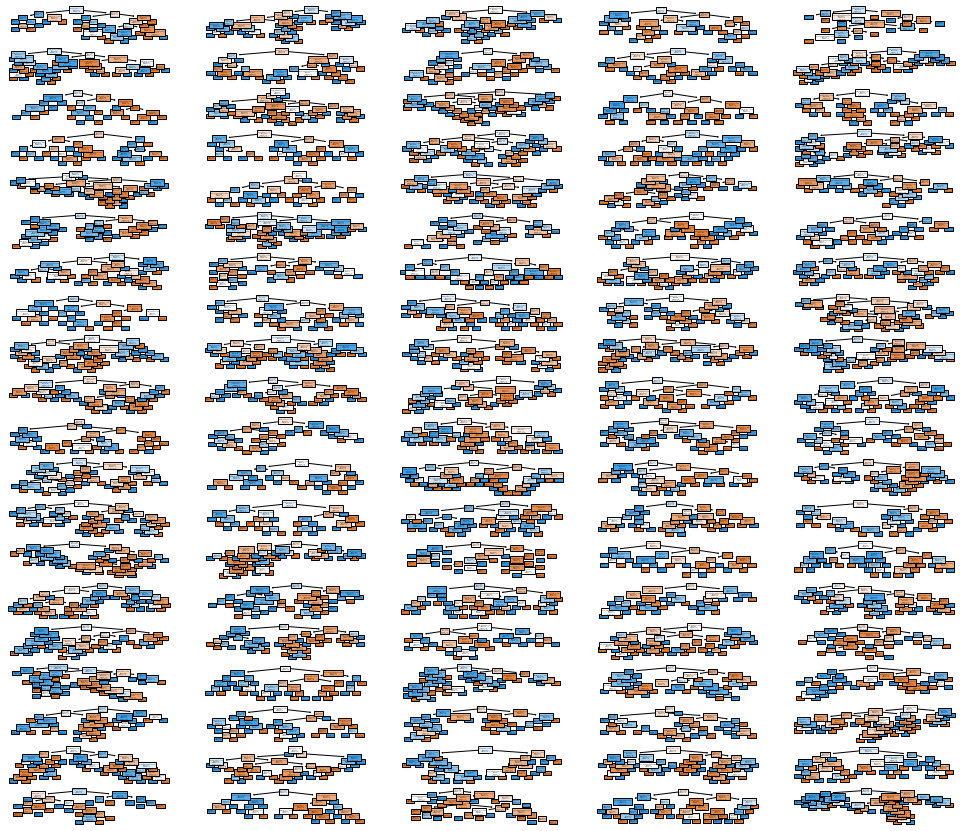

In [24]:
plt.figure(figsize=(17, 15))
for j  in range(clf_03.n_estimators):
    plt.subplot(20,5, j+1)
    _ = tree.plot_tree(clf_03.estimators_[j], feature_names=x.columns, filled=True)


##### Tuning the Random Forrest

To tune the forrest adding more estimators thus increasing the trees in the forrest, adding a max_depth with limit the levels within each tree and max features will limit the maximium number of features considered for splitting. As a critereon entropy was added to try and icnrease the amount of information gained.

In [44]:
clf_04 = RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=10, max_features=3)

clf_04.fit(x_train, y_train)

y_pred_04 = clf_04.predict(x_Vali_test)

Accuracy = accuracy_score(y_Vali_test, y_pred_04)

print("Accuracy: %.2f" % (Accuracy*100), "%")

Accuracy: 84.48 %


##### Visualising the Tuned Random Forrest

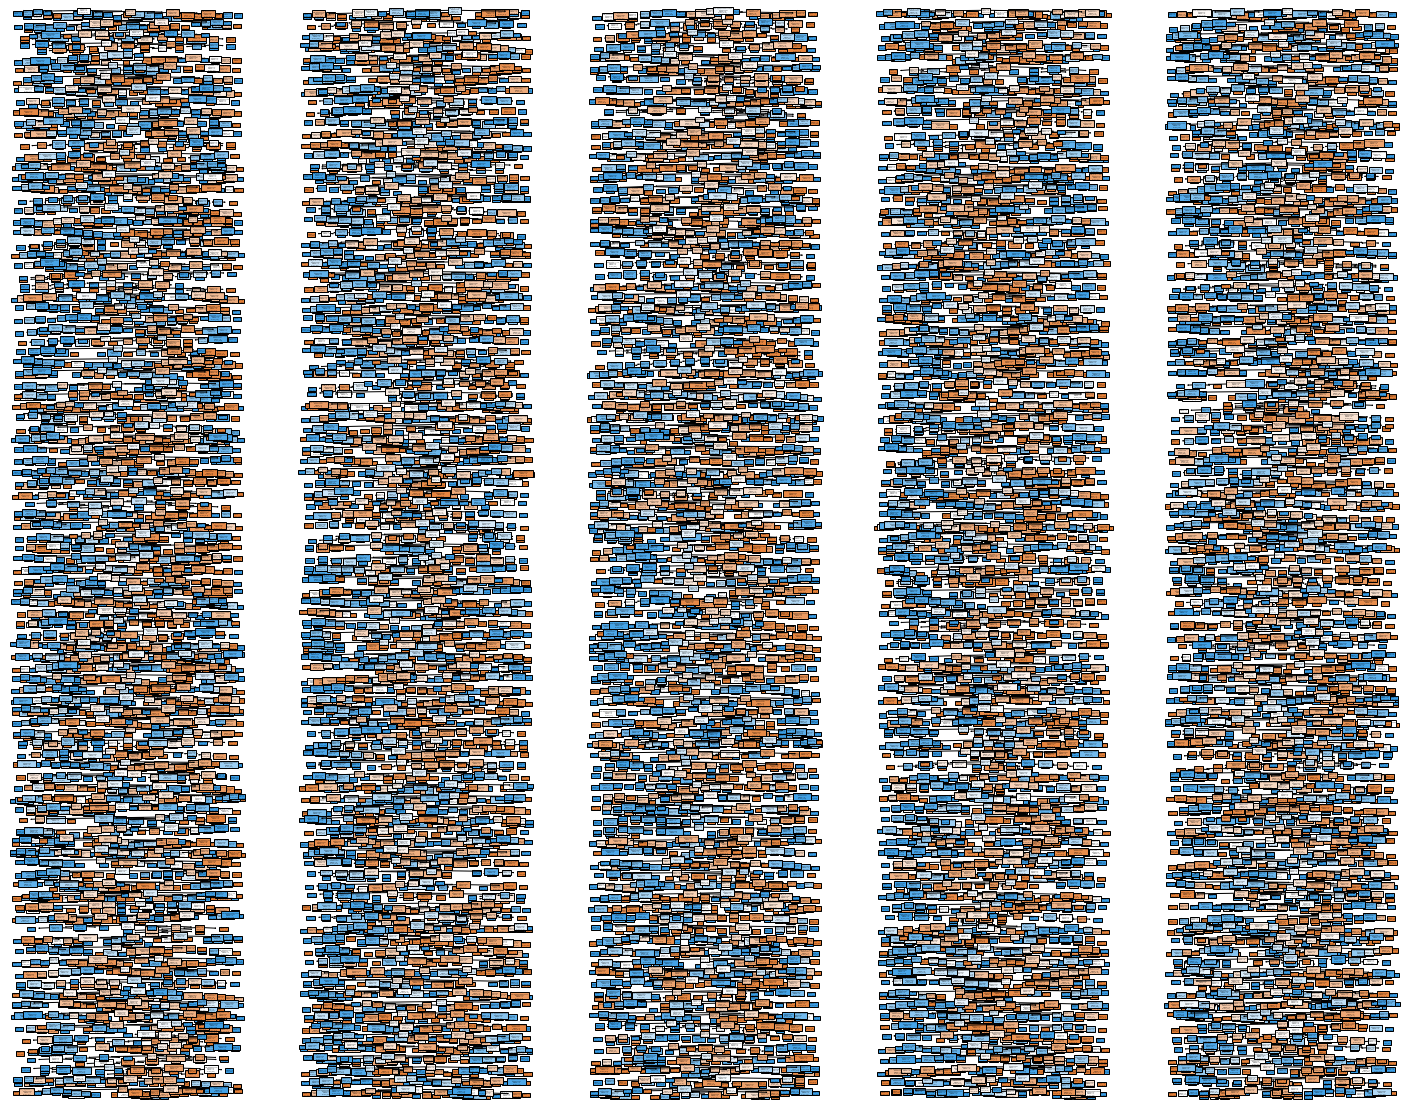

In [45]:
plt.figure(figsize=(25, 20))
for j  in range(clf_04.n_estimators):
    plt.subplot(100, 5, j+1)
    _ = tree.plot_tree(clf_04.estimators_[j], feature_names=x.columns, filled=True)

# Fin